In [86]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.rc('axes', unicode_minus=False)

np.random.seed(1234)

In [87]:
boston = pd.read_csv('data/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [88]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


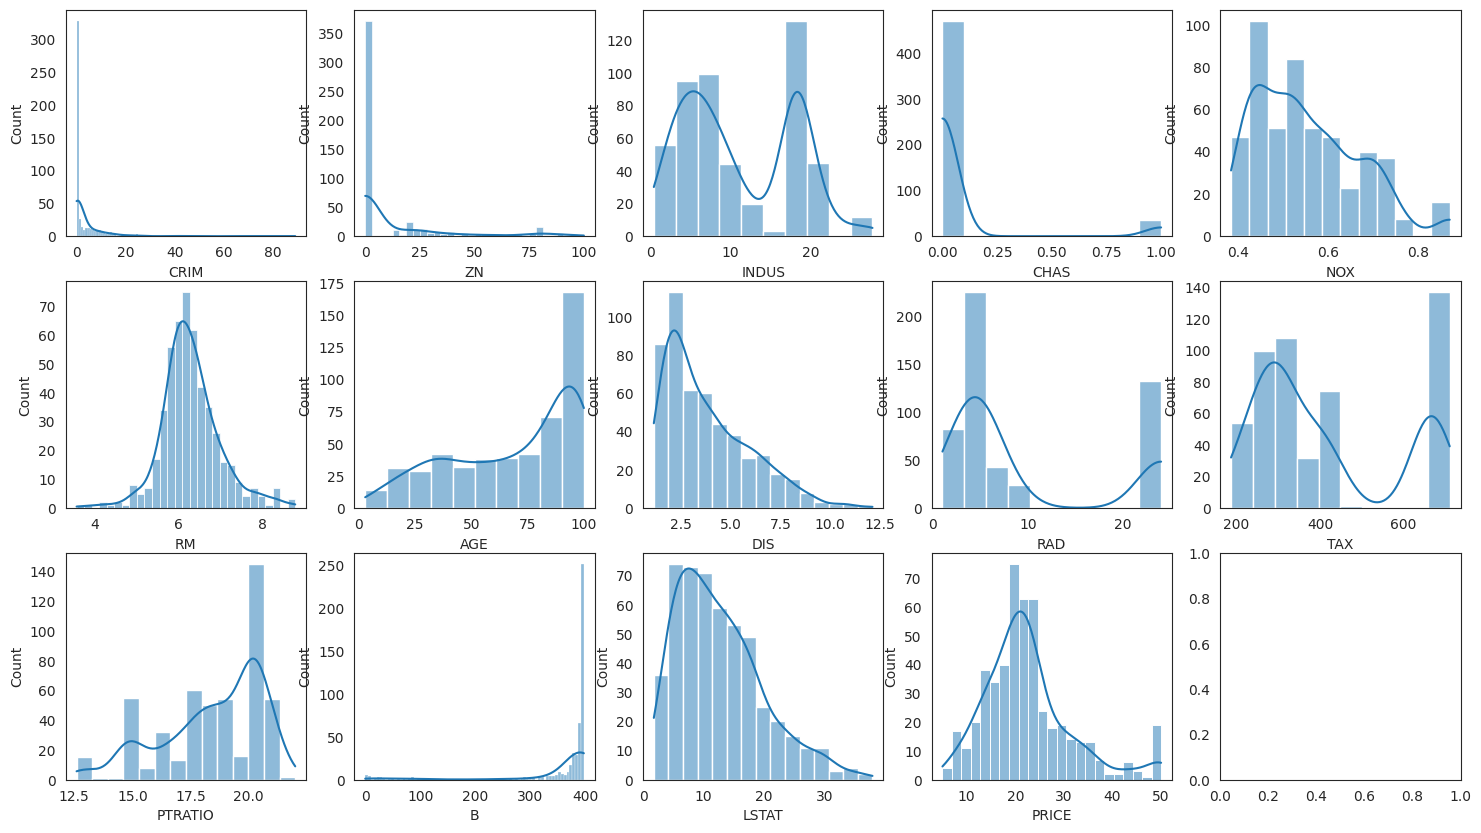

In [89]:
fig, axes = plt.subplots(figsize=(18,10), nrows=3, ncols=5)

for col, ax in zip(boston.columns, axes.reshape(15)):
    sns.histplot(x=boston[col], kde=True, ax=ax)

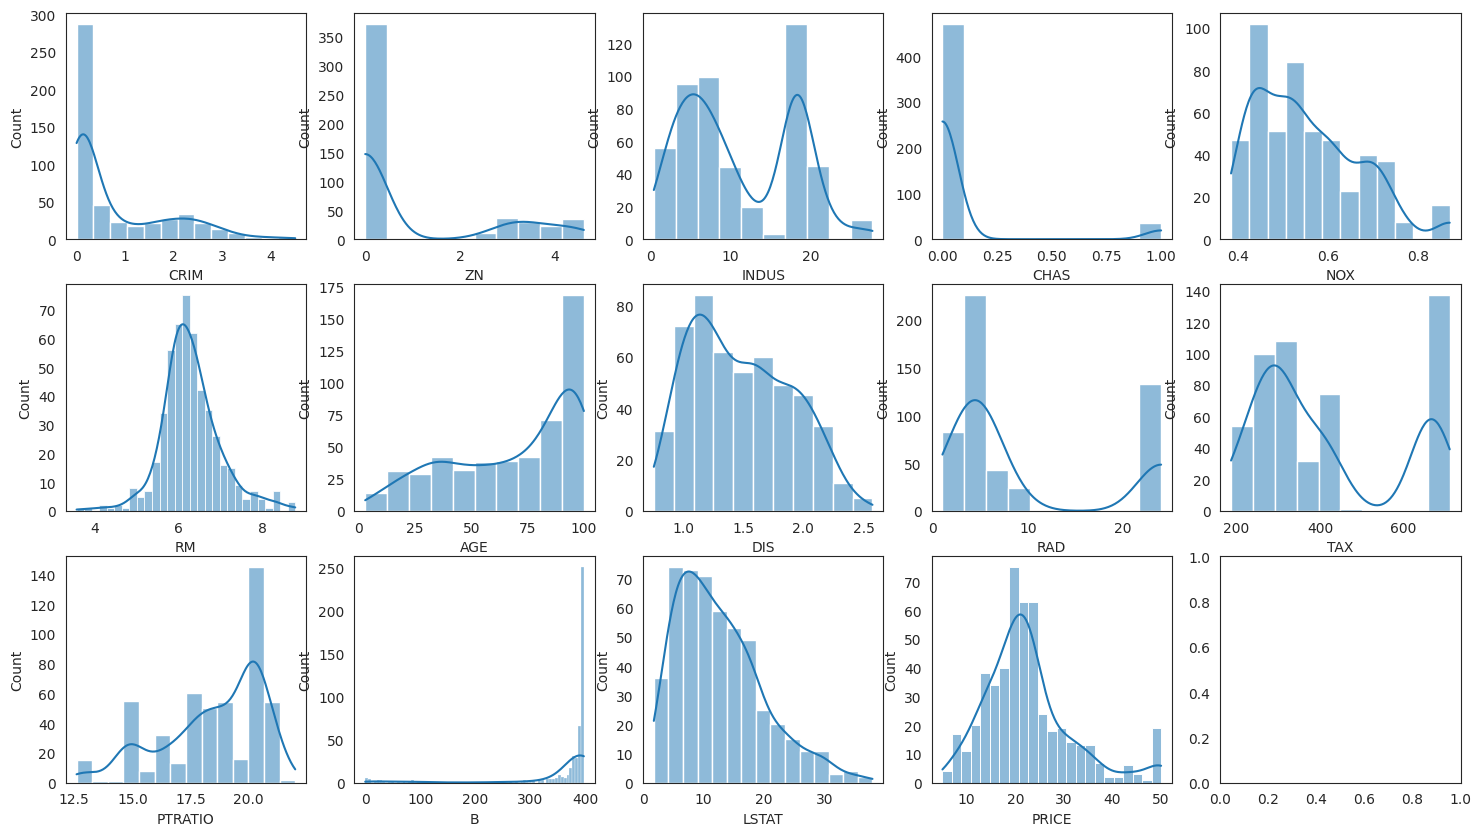

In [90]:
log_col = ['CRIM','ZN','DIS']
boston.loc[:,log_col] = np.log1p(boston[log_col])

fig, axes = plt.subplots(figsize=(18,10), nrows=3, ncols=5)

for col, ax in zip(boston.columns, axes.reshape(15)):
    sns.histplot(x=boston[col], kde=True, ax=ax)

In [91]:
y = boston.PRICE
x = boston.drop(columns='PRICE')

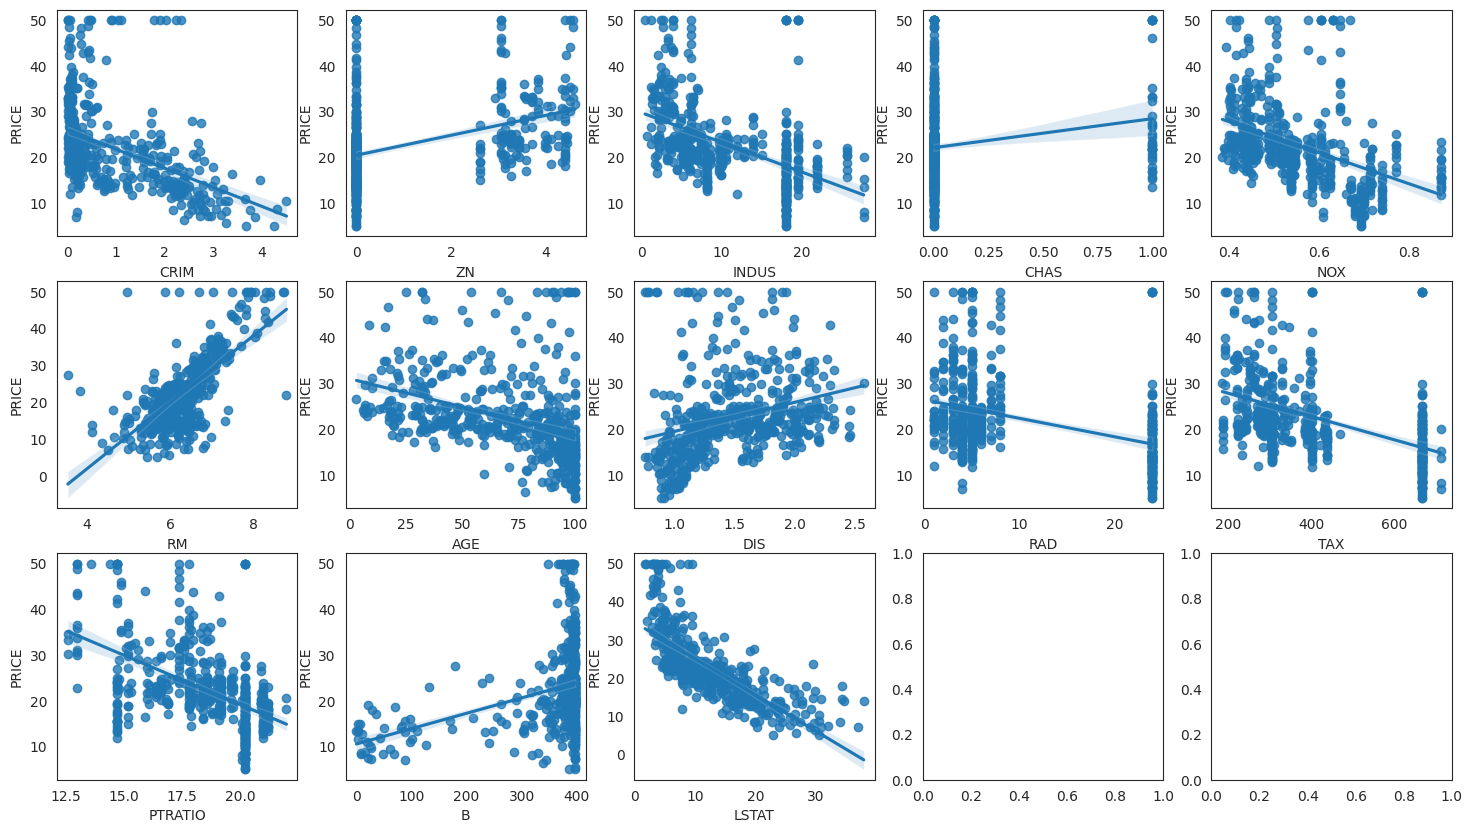

In [92]:
fig, axes = plt.subplots(figsize=(18,10), nrows=3, ncols=5)

for col, ax in zip(x.columns, axes.reshape(15)):
    sns.regplot(x=x[col], y=y, ax=ax)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [94]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print('MAE:', mean_absolute_error(y_test,pred))
print('R2:', r2_score(y_test,pred))

MAE: 3.602464292148096
R2: 0.7584770008576599


In [95]:
#정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

#
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [96]:
lr_std = LinearRegression()
lr_std.fit(x_train_std, y_train)
pred = lr_std.predict(x_test_std)
print('MAE:', mean_absolute_error(y_test,pred))
print('R2:', r2_score(y_test,pred))

MAE: 3.602464292148093
R2: 0.7584770008576612


In [97]:
lr_std.intercept_

22.488135593220342

In [98]:
#변수의 중요도를 알 수 있음
coeff = pd.Series(data = np.round(lr_std.coef_, 4), index=x.columns)
coeff.sort_values(ascending=False)

RAD        3.2863
RM         1.8937
B          0.8585
CHAS       0.7726
ZN         0.7188
AGE       -0.2419
INDUS     -0.4195
CRIM      -1.0302
TAX       -2.0377
PTRATIO   -2.4099
NOX       -2.9164
LSTAT     -4.0146
DIS       -4.3378
dtype: float64

- 다항회귀

In [99]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_2 = poly.fit_transform(x_train_std)
x_test_2 = poly.fit_transform(x_test_std)
print(x_train_std.shape)
print(x_train_2.shape)

(354, 13)
(354, 105)


In [100]:
lr2 = LinearRegression()
lr2.fit(x_train_2, y_train)
pred = lr2.predict(x_test_2)
print('MAE:', mean_absolute_error(y_test,pred))
print('R2:', r2_score(y_test,pred))

MAE: 2.6977147152549343
R2: 0.8535801503084717


In [101]:
poly = PolynomialFeatures(degree=5)
x_train_5 = poly.fit_transform(x_train_std)
x_test_5 = poly.fit_transform(x_test_std)
print(x_train_std.shape)
print(x_train_5.shape)
lr5 = LinearRegression()
lr5.fit(x_train_5, y_train)
pred = lr5.predict(x_test_5)
print('MAE:', mean_absolute_error(y_test,pred))
print('R2:', r2_score(y_test,pred))

(354, 13)
(354, 8568)
MAE: 7.841553357580533
R2: -2.0108252267655344


- 규제 선형 모델

In [102]:
from sklearn.linear_model import Ridge
param = [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000]

for a in param:
    lr_r = Ridge(alpha=a)
    lr_r.fit(x_train_std, y_train)
    pred = lr_r.predict(x_test_std)
    print('MAE@', a, ':', mean_absolute_error(y_test,pred))

MAE@ 0.001 : 3.60244480680522
MAE@ 0.01 : 3.6022694956885544
MAE@ 0.1 : 3.600521998005518
MAE@ 1 : 3.583883209973706
MAE@ 10 : 3.4880960591433854
MAE@ 50 : 3.4280051873343487
MAE@ 100 : 3.5201584945466693
MAE@ 1000 : 4.683069925093094


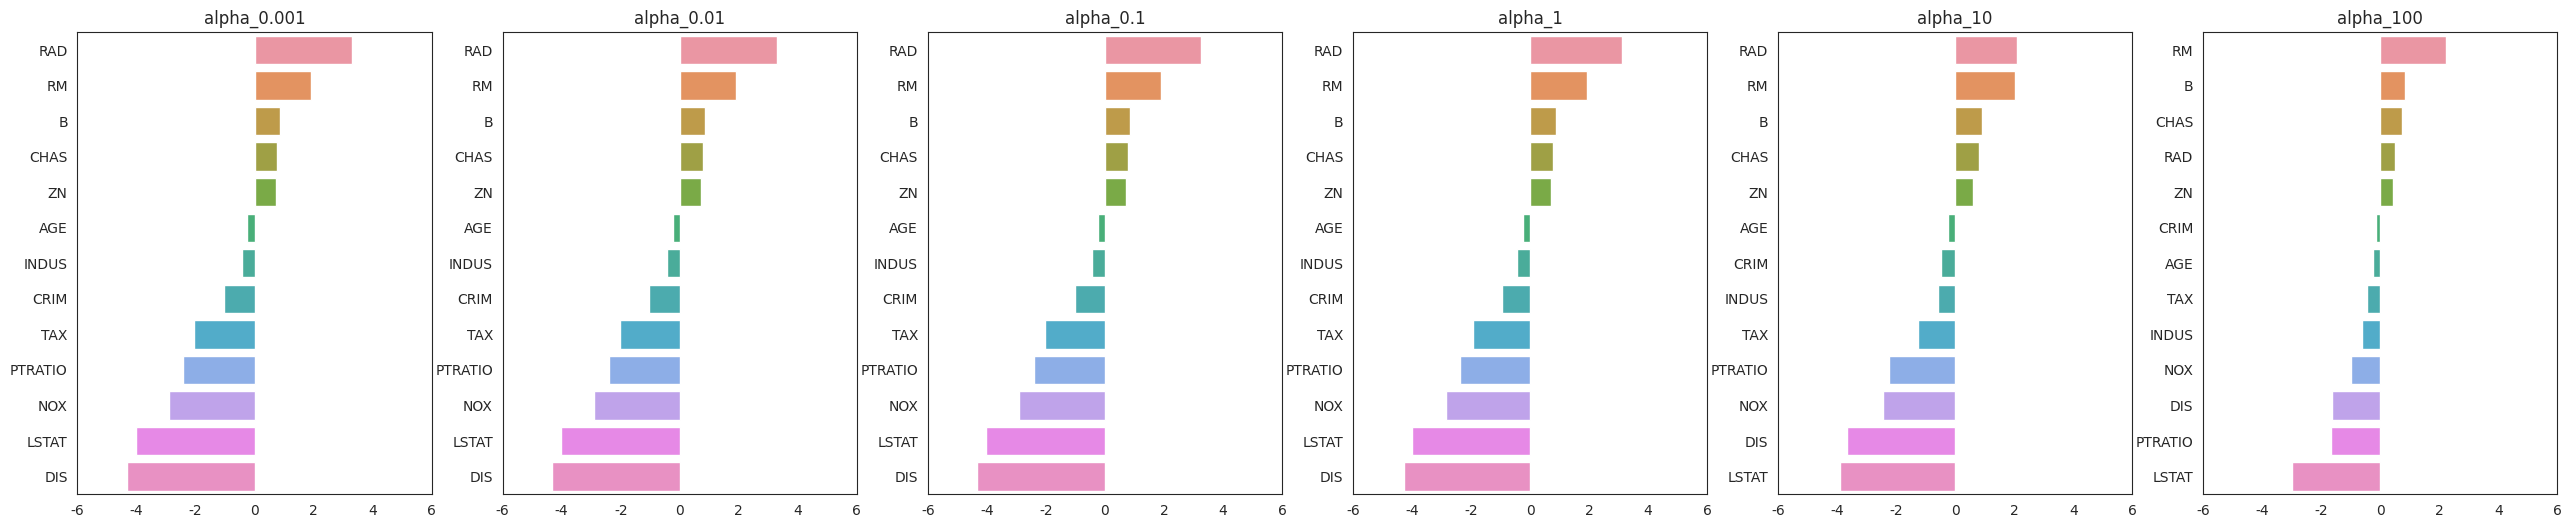

In [103]:
fig, axes= plt.subplots(figsize=(32,6), ncols=6)

param = [0.001, 0.01, 0.1, 1, 10, 100]
for a, ax in zip(param, axes):
    lr_r = Ridge(alpha=a)
    lr_r.fit(x_train_std, y_train)
    coeff = pd.Series(data = np.round(lr_r.coef_, 4), index=x.columns)
    coeff = coeff.sort_values(ascending=False)
    
    ax.set_title('alpha_'+str(a))
    ax.set_xlim(-6,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=ax)

In [104]:
from sklearn.linear_model import Lasso
param = [0.001, 0.01, 0.1, 1, 10, 100]

for a in param:
    lr_l = Lasso(alpha=a)
    lr_l.fit(x_train_std, y_train)
    pred = lr_l.predict(x_test_std)
    print('MAE@', a, ':', mean_absolute_error(y_test,pred))

MAE@ 0.001 : 3.600265808850217
MAE@ 0.01 : 3.580670345178958
MAE@ 0.1 : 3.4643462427060734
MAE@ 1 : 3.896806281355929
MAE@ 10 : 6.996966993755575
MAE@ 100 : 6.996966993755575


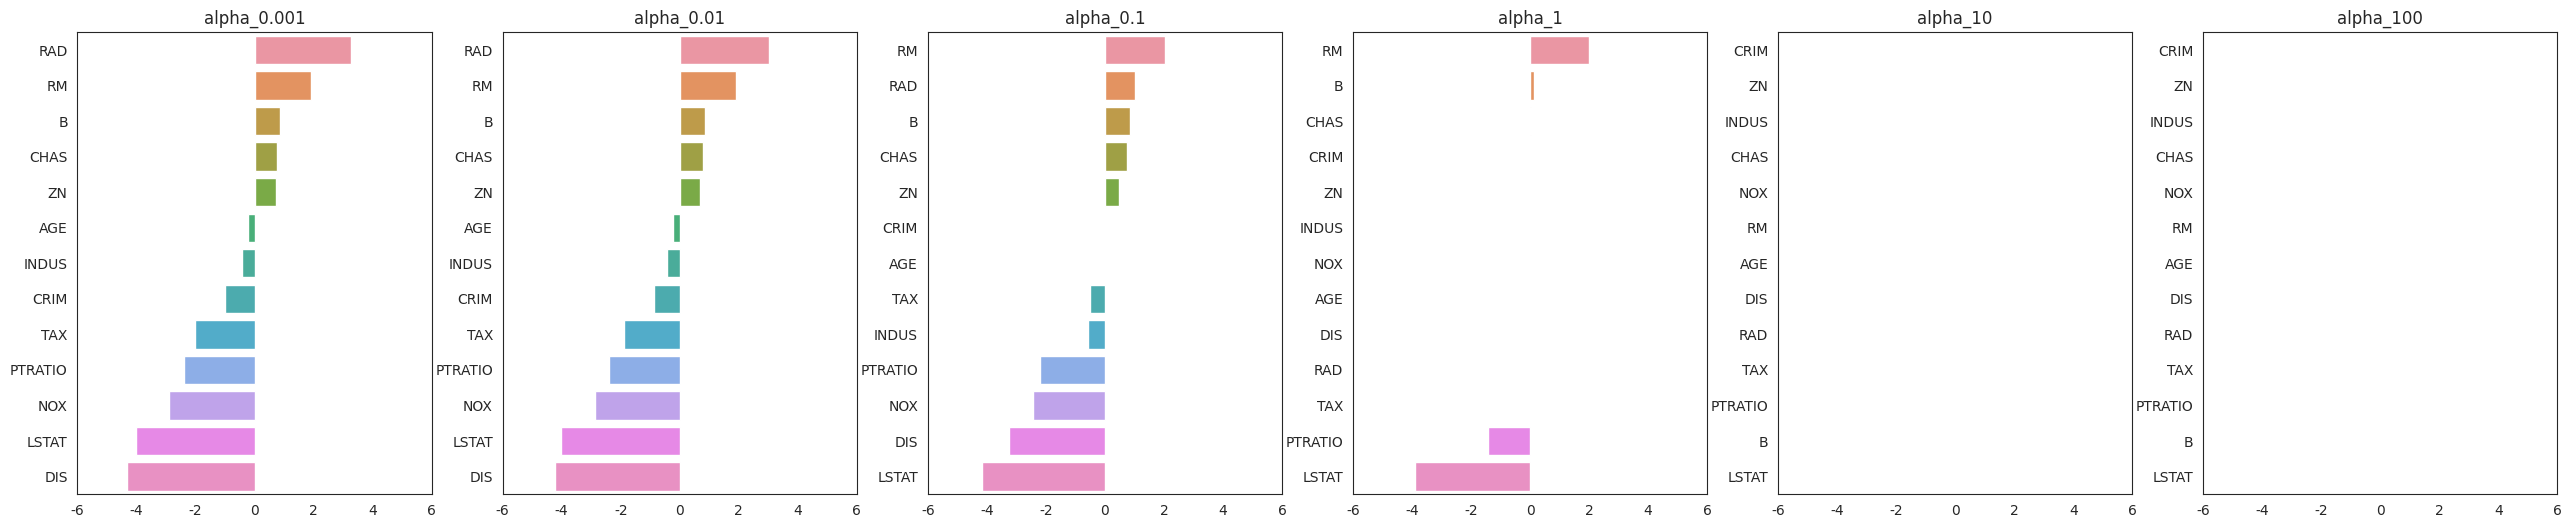

In [105]:
fig, axes= plt.subplots(figsize=(32,6), ncols=6)

param = [0.001, 0.01, 0.1, 1, 10, 100]
for a, ax in zip(param, axes):
    lr_l = Lasso(alpha=a)
    lr_l.fit(x_train_std, y_train)
    coeff = pd.Series(data = np.round(lr_l.coef_, 4), index=x.columns)
    coeff = coeff.sort_values(ascending=False)
    
    ax.set_title('alpha_'+str(a))
    ax.set_xlim(-6,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=ax)

In [106]:
#01 라쏘 먼저 작업 -> 지워지면 변수 제거(변수 제거용)
#02 릿지 사용해서 선형회귀 모델 찾기

- 의사결정나무

In [107]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred = dt.predict(x_test)
print('MAE:', mean_absolute_error(y_test,pred))
print('R2:', r2_score(y_test,pred))

MAE: 2.648026315789474
R2: 0.8442298974681135


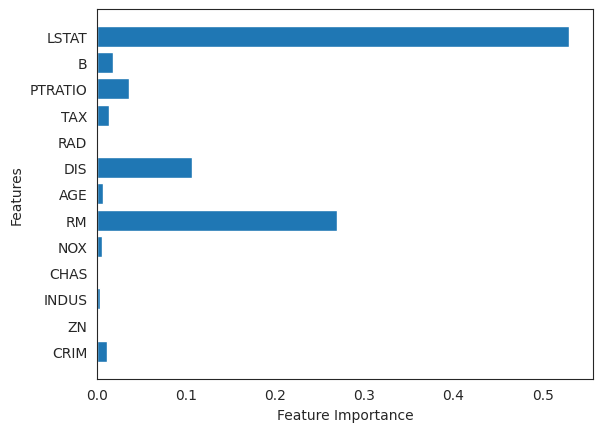

In [108]:
plt.barh(x_train.columns, dt.feature_importances_, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features');

In [109]:
dt = DecisionTreeRegressor()
dt.fit(x_train_std, y_train)
pred = dt.predict(x_test_std)
print('MAE:', mean_absolute_error(y_test,pred))
print('R2:', r2_score(y_test,pred))

MAE: 2.6328947368421054
R2: 0.83604724769822


In [110]:
col = ['CRIM','AGE']
x_train_drop = x_train.drop(columns=col)
x_test_drop = x_test.drop(columns=col)
dt = DecisionTreeRegressor()
dt.fit(x_train_drop, y_train)
pred = dt.predict(x_test_drop)
print('MAE:', mean_absolute_error(y_test,pred))
print('R2:', r2_score(y_test,pred))

MAE: 2.8381578947368418
R2: 0.8140921956073819


In [111]:
col = ['CHAS','ZN','RAD']
x_train_drop = x_train.drop(columns=col)
x_test_drop = x_test.drop(columns=col)
dt = DecisionTreeRegressor()
dt.fit(x_train_drop, y_train)
pred = dt.predict(x_test_drop)
print('MAE:', mean_absolute_error(y_test,pred))
print('R2:', r2_score(y_test,pred))

MAE: 2.632236842105263
R2: 0.8568739291579024
